In [ ]:
!pip install konlpy
!pip install nltk
!pip install wordcloud

     |████████████████████████████████| 19.4 MB 5.7 MB/s 
     |████████████████████████████████| 448 kB 46.9 MB/s 


In [ ]:
import requests, json, time
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import time
import random
import requests

from bs4 import BeautifulSoup

import json

import konlpy
from konlpy.tag import *
from nltk import Text
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from itertools import count
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def get_request_url(url):
    try :
        req = requests.get(url)
        html = req.text
        soup = BeautifulSoup(html, 'html.parser')
        print("URL request Success")
        return soup

    except Exception as e:
        print("Error for URL")
        return None

In [ ]:
def getcomment(i, product_number):

    url1 = 'http://deal.11st.co.kr/product/SellerProductDetail.tmall?method=getProductReviewList&prdNo='
    product_number = str(product_number)
    url3 = '&page='
    url4 = i
    url5 = '&pageTypCd=first&reviewDispYn=Y&isPreview=false&reviewOptDispYn=Y&optSearchBtnAndGraphLayer=Y&reviewBottomBtn=Y&openDetailContents=Y&pageSize=100&isIgnoreAuth=false&lctgrNo=1001397&leafCtgrNo=0&groupProductNo=0&groupFirstViewPrdNo=0&selNo=41580890#this'

    url = url1 + product_number + url3 + url4 + url5
    #print(url)
    return url


In [ ]:
def dataHandling(soup,product_number):
    df_feed_code = []
    df_review = []
    df_date = []
    df_star = []
    df_product = []

    #리뷰 모으기
    reviews = soup.select(
    'p.bbs_summary > span.summ_conts > a'
    )

    for review in reviews :
        review_ = review.text
        review_clean = review_.replace('\n', '')
        review_clean = review_clean.replace('\r', '')
        review_clean = review_clean.replace('\t', '')
        df_review.append(review_clean)
        #print(review_clean)

    #날짜 모으기
    dates = soup.select(
        'span.date'
    )

    for date in dates :
        date = date.text
        df_date.append(date)
        #print(date)

    #평점 모으기
    stars = soup.select(
     'div.bbs_top > div.top_l > div > p > span'
    )
    for star in stars :
        star = star.text
        star_clean = int(re.findall('\d', str(star))[1])
        df_star.append(star_clean)
        #print(star_clean)

    #구매한 상품 모으기
    products = soup.select(
        'div.bbs_cont_wrap > div.bbs_cont > p.option_txt'
    )
    for product in products :
        product = product.text
        df_product.append(product)
        #print(product)

    #feed code 부여하기
    codes = soup.select('p.bbs_summary')

    for code in codes :
        code_imsi = code.get('data-contno')
        #print(code_imsi)
        code_sum = '11st_' + '%s_'%(product_number) + str(code_imsi)
        df_feed_code.append(code_sum)

    print(len(df_review),len(df_star),len(df_date),len(df_product))

    if len(df_review) ==len(df_star) == len(df_date) == len(df_product) :
        pass
    else :
        return None

    # 구매평, 날짜, 평점, 상품을 합하여 하나의 데이터 프레임으로 생성
    df1 = pd.DataFrame({'feed_code':df_feed_code,'content':df_review, 'date':df_date, 'star':df_star, 'product_select':df_product})
    df1 = df1[['feed_code','content', 'date', 'star', 'product_select']]
    return df1


In [ ]:
element = get_request_url("https://search.shopping.naver.com/catalog/19450308684?query=텀블러&NaPm=ct=l01zsfc8|ci=83f336535081ab5ec93e4b5499b03c3abf188a50|tr=slsl|sn=95694|hk=8c40fba7dc1ebb6eaca0447ffb3d4db932412137")

URL request Success


In [ ]:
reviews = element.select("#section_review > ul ") #> li.reviewItems_expand__3Gk1h > div.reviewItems_etc_area__2P8i3 > span:nth-child(4)

In [ ]:
reviews = reviews[0].select("li")

In [ ]:
reviews

[<li class=""><div class="reviewItems_etc_area__2P8i3"><span class="reviewItems_average__16Ya-"><span class="reviewItems_star__2EEY8"><span class="reviewItems_star_red__1mZYz" style="width:100%">평점</span></span>5</span><span class="reviewItems_etc__1YqVF">헬로젬</span><span class="reviewItems_etc__1YqVF">esse****</span><span class="reviewItems_etc__1YqVF">22.01.06.</span><span class="reviewItems_etc__1YqVF">색상: 핑크</span></div><div class="reviewItems_review__1eF8A"><div class="reviewItems_review_text__2Bwpa"><em class="reviewItems_title__39Z8H">몇달전에 제가 사보고 너무 괜찮아서 여자친구에게 한개 더 사줬습니다.그립감이 제 손엔 아주 적절해서 매우 만족했었습니다만, 여자친구에게는 조금 큰감이 없지 않아 있습니다.다만, 불</em><p class="reviewItems_text__XIsTc">몇달전에 제가 사보고 너무 괜찮아서 여자친구에게 한개 더 사줬습니다.그립감이 제 손엔 아주 적절해서 <em>매우 만족했었습니다만, 여자친구에게는 조금 큰감이 없지 않아 있습니다</em>.다만, 불편한정도는 아니라고 하네요. 워낙 대용량 텀블러를 저나 여자친구나 좋아해서 선택했는데 아주 좋은 선택이었습니다. <br/><br/>장점- <em>대용량 텀블러를 원하시는 분이라면 적극 추천합니다</em>. <em>용량이 매우 많이 담겨서</em> <em>용량에 대해선 아주 만족하고</em> 쓰고 있습니다. 또한 <em>보온이 아주 잘됩니다</em>. 뜨거운 커피나

In [ ]:
review_list = []
for review in reviews:
  review_list.append({'content':review.select_one(".reviewItems_text__XIsTc").text})

review_df = pd.DataFrame(review_list)

In [ ]:
review_df

,content
0,몇달전에 제가 사보고 너무 괜찮아서 여자친구에게 한개 더 사줬습니다.그립감이 제 손...
1,높이 감 잡으시라고 각티슈 케이스랑 찍어보았어요!아직 차에는 안꼽아봐서 모르겠지만 ...
2,주말 동안 검색 통해서 스테인리스 세척 방법 확인 후 1~2회 세척하고 오늘 처음 ...
3,어떤분이 밀폐가 안된다는 후기에 이물질 방지용 뚜껑이라고 생각해 달라는 답신이 있었...
4,친구가 예전에 스벅에서 3만원대 주고 샀고 했는데 여긴 넘 저렴해서 긴가민가했지만 ...
5,아이스 보관용으로 아주 좋아요 저는 색별로 세가지 구입했는데 돌아가며 쓰기 좋네요...
6,"빠른배송으로 잘받았고 맛나는 사탕도 감사해요ㅡㅎ포장은 뽁뽁이로 아주깔끔히 왔고, 냄..."
7,우선 다른 텀블러들에 비해 가격이 많이 비싼편인데 성능은 잘 모르겠어요손잡이가 없어...
8,디자인은 화면이랑 같은데 뚜껑 마개부분을 돌려서 빨대구멍이 안보이게 하더라도 사이틈...
9,다른점을 여쭤봤더니 폰트색이 회색이라고해서조금 아쉬워하며 기다렸는데 하얀폰트 버전으...


In [ ]:
text = "".join(review_df["content"].values)
len(text)

5765

In [ ]:
okt = Okt()
nouns = okt.nouns(text)

In [ ]:
review = Text(nouns,name = "review")
datas = review.vocab()

In [ ]:
wc = WordCloud(font_path = "D2Coding.ttf",background_color = "white")

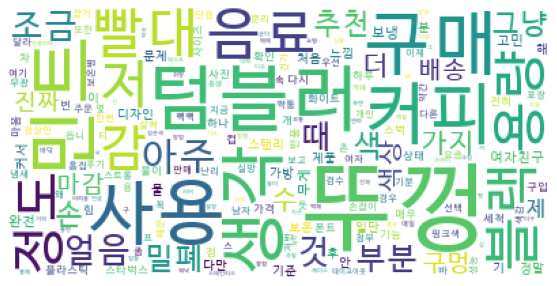

In [ ]:
plt.figure(figsize = (20,5))
plt.imshow(wc.generate_from_frequencies(datas))
plt.axis('off')
plt.show()

In [ ]:
from nltk.classify import NaiveBayesClassifier

In [ ]:
df_dic = pd.read_csv("/content/subjectivity-polarity.csv", encoding='utf-8')
df = df_dic[df_dic['max.value'].notnull()]
df = df[['ngram','max.value']]

# 한글과 영문이 섞여있는 ngram에서, 가장 앞에 있는 한글단어만 추출하는 정규 표현식
p = r'^[가-힣]+'

# KOSAC으로 부터 긍정(POS), 부정(NEG), 중립(NEU)의 사전을 생성한다
pos_dic = []
neg_dic = []
neu_dic = []

In [ ]:

for i, row in df.iterrows():
    if row['max.value'] ==  'POS':
        pos_dic.extend(re.findall(p, row['ngram']))
    elif row['max.value'] ==  'NEG':
        neg_dic.extend(re.findall(p, row['ngram']))
    elif row['max.value'] ==  'NEUT':
        neu_dic.extend(re.findall(p, row['ngram']))

# 중복 단어를 제거하기 위해서 set로 만들었다가 list로 변환시킨다
positive_vocab = list(set(pos_dic)) #총 1830개 단어
negative_vocab = list(set(neg_dic)) #총 1623개 단어
neutral_vocab = list(set(neu_dic)) #총 340개 단어

def word_feats(words):
    return dict((word, True) for word in words)

# 사전의 긍정, 부정, 중립단어를 navie bayes에 학습시킬 준비를 한다
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

# 트레인 데이터셋 생성 완료! naive bayes에 학습 시킨다
train_set = negative_features + positive_features + neutral_features
classifier = NaiveBayesClassifier.train(train_set)

# 예측하기 위해 데이터셋 준비(_data.csv 앞에 글자만 작성. beauty를 예시로 써둠)

print('총 문장수는 '+ str(len(datas)) + '개 입니다')

neg = 0; pos = 0 ;neu = 0;
pos_word = ['POS'] ; neg_word = ['NEG'] ;neu_word = ['NEU'];

# for문으로 예측하고 싶은 문장을 돌려서 한 문장씩 예측 시킨다
for sentence in review_df['content']:
    sentence = sentence.lower()
    words = sentence.split(',')

    for word in words:
        classResult = classifier.classify(word_feats(word))
        if classResult == 'neg':
            neg = neg + 1
            neg_word.append(word)
        elif classResult == 'pos':
            pos = pos + 1
            pos_word.append(word)
        elif classResult == 'neu' :
            neu = neu +1
            neu_word.append(word)

# 결과 출력시키기
print('긍정의 문장 수는 ' + str(pos) +'개 입니다')
print('부정의 문장 수는 ' + str(neg) +'개 입니다')
print('중립의 문장 수는 ' + str(neu) +'개 입니다')


# 긍정, 부정, 중립의 문장을 가장 많이 나온 순으로 나열하여 csv 파일로 저장
three_type = [pos_word, neg_word, neu_word]

for one_type in three_type:
    w_count = {}
    print(one_type)
    for idx,  one_sentence in enumerate(one_type):
        if idx == 0:
            continue
        try: w_count[one_sentence] +=1
        except: w_count[one_sentence] = 1
    pd_data = pd.DataFrame(list(w_count.items()))
    # pd_data.columns = ['sentence', 'count']
    # pd_data = pd_data.sort_values('count', ascending=False)
    pd_data.to_csv('data_%s_%s.csv'%('review', one_type[0]), mode = 'w', index = False, encoding='utf-8', index_label= False)

print('csv 파일로(3개) 저장 완료')


TypeError: ignored

In [ ]:
positive = float(pos)*100 / len(review_df['content'])
negative = float(neg)*100 / len(review_df['content'])
neutrality = float(neu)*100 / len(review_df['content'])
                                


In [ ]:
dict = {"positive":(float(pos)*100 / len(review_df['content'])),"negative":(float(neg)*100 / len(review_df['content'])),"neutrality":(float(neu)*100 / len(review_df['content']))}

In [ ]:
pl = pd.DataFrame(dict,index = [0])


In [ ]:
pl.plot.pie()